# Визуализация модели из эксперимента 20

Восстановление модели из сохраненных векторов параметров и визуализация весов

In [1]:
import os
import sys
import pickle
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# Добавляем пути к проекту
sys.path.append('..')
sys.path.append('../scripts')

from src.model import FlexibleMLP
from scripts.viz_model import describe_and_visualize, set_model_params_from_vector

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

## 1. Загрузка данных и создание модели

In [2]:
# Пути к данным
exp_dir = '../scripts/data/checkpoints/exp20'
learning_rates = [0.001, 0.01, 0.1, 0.5]

# Создаем модель с теми же параметрами что в эксперименте
model = FlexibleMLP(
    hidden_dim=8,
    num_hidden_layers=1,
    input_downsample=6
)

print("📊 Архитектура модели:")
describe_and_visualize(model, out_dir="initial_weights_viz")

# Загружаем параметры для всех lr
all_params = {}
for lr in learning_rates:
    params_path = os.path.join(exp_dir, f'params_lr{lr}.pkl')
    print(f'\nЗагружаем {params_path}...')
    
    if os.path.exists(params_path):
        with open(params_path, 'rb') as f:
            params = pickle.load(f)
        all_params[lr] = params
        print(f'  ✅ lr={lr}: {params.shape} (итераций × параметров)')
    else:
        print(f'  ❌ Файл не найден: {params_path}')

print(f'\nЗагружено {len(all_params)} наборов параметров')

📊 Архитектура модели:
FlexibleMLP  [params=386 / train=386]
├─ downsampler (AdaptiveAvgPool2d)  params=0 / train=0
└─ model (Sequential)  params=386 / train=386
   ├─ 0 (Linear)  params=296 / train=296
   ├─ 1 (ReLU)  params=0 / train=0
   └─ 2 (Linear)  params=90 / train=90

Saved weight visualizations to: /Users/igoreshka/Desktop/SGDiffusion/notebooks/initial_weights_viz

Загружаем ../scripts/data/checkpoints/exp20/params_lr0.001.pkl...
  ✅ lr=0.001: (1020, 386) (итераций × параметров)

Загружаем ../scripts/data/checkpoints/exp20/params_lr0.01.pkl...
  ✅ lr=0.01: (1020, 386) (итераций × параметров)

Загружаем ../scripts/data/checkpoints/exp20/params_lr0.1.pkl...
  ✅ lr=0.1: (1020, 386) (итераций × параметров)

Загружаем ../scripts/data/checkpoints/exp20/params_lr0.5.pkl...
  ✅ lr=0.5: (1020, 386) (итераций × параметров)

Загружено 4 наборов параметров


## 2. Визуализация начальных и финальных весов


🔍 Анализ lr=0.001:
  📊 Начальные веса (итерация 0):
FlexibleMLP  [params=386 / train=386]
├─ downsampler (AdaptiveAvgPool2d)  params=0 / train=0
└─ model (Sequential)  params=386 / train=386
   ├─ 0 (Linear)  params=296 / train=296
   ├─ 1 (ReLU)  params=0 / train=0
   └─ 2 (Linear)  params=90 / train=90

Saved weight visualizations to: /Users/igoreshka/Desktop/SGDiffusion/notebooks/weights_viz_lr0.001_initial
  📊 Финальные веса (итерация 1019):
FlexibleMLP  [params=386 / train=386]
├─ downsampler (AdaptiveAvgPool2d)  params=0 / train=0
└─ model (Sequential)  params=386 / train=386
   ├─ 0 (Linear)  params=296 / train=296
   ├─ 1 (ReLU)  params=0 / train=0
   └─ 2 (Linear)  params=90 / train=90

Saved weight visualizations to: /Users/igoreshka/Desktop/SGDiffusion/notebooks/weights_viz_lr0.001_final
  ✅ Сохранены визуализации для lr=0.001

🔍 Анализ lr=0.01:
  📊 Начальные веса (итерация 0):
FlexibleMLP  [params=386 / train=386]
├─ downsampler (AdaptiveAvgPool2d)  params=0 / train=0
└─ m

KeyboardInterrupt: 

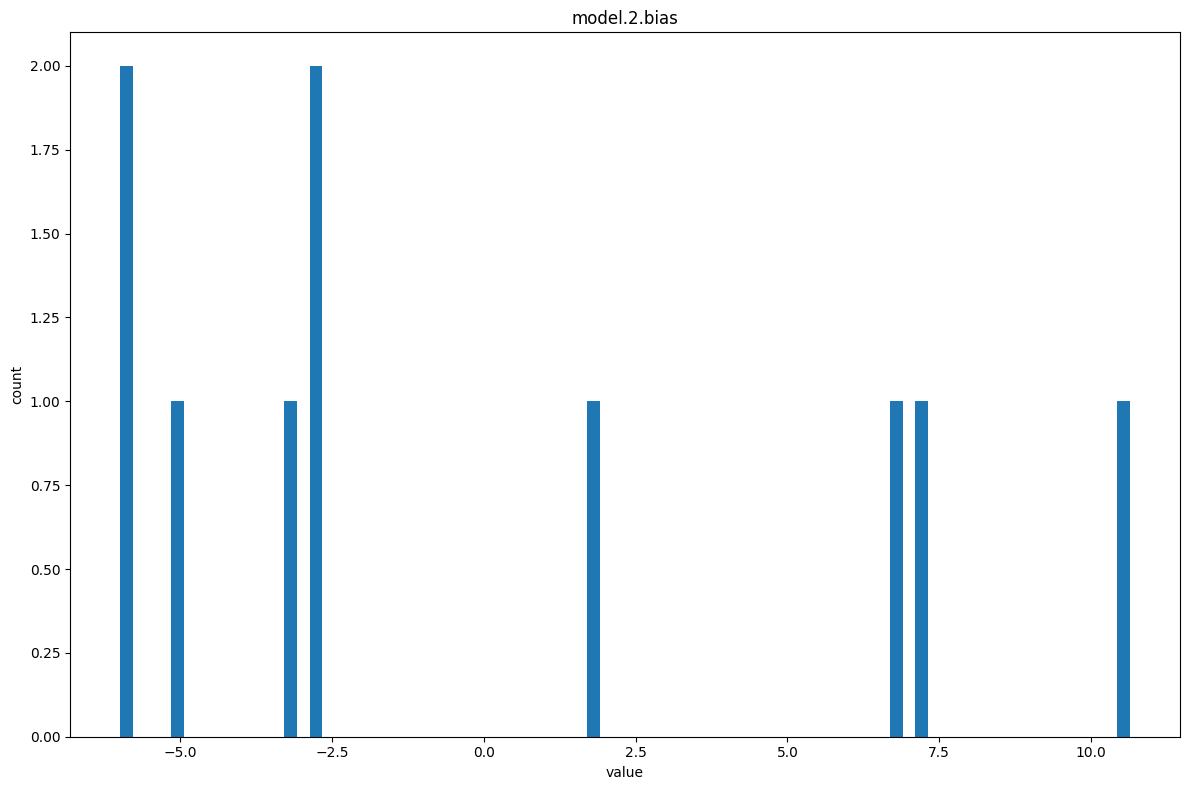

In [3]:
# Визуализируем начальные и финальные веса для каждого lr
for lr, params in all_params.items():
    print(f"\n🔍 Анализ lr={lr}:")
    
    # Начальные веса (первая итерация)
    print(f"  📊 Начальные веса (итерация 0):")
    set_model_params_from_vector(model, params[0])
    artifacts_initial = describe_and_visualize(model, out_dir=f"weights_viz_lr{lr}_initial")
    
    # Финальные веса (последняя итерация)
    print(f"  📊 Финальные веса (итерация {len(params)-1}):")
    set_model_params_from_vector(model, params[-1])
    artifacts_final = describe_and_visualize(model, out_dir=f"weights_viz_lr{lr}_final")
    
    print(f"  ✅ Сохранены визуализации для lr={lr}")

## 3. Сравнение весов на разных итерациях


🔄 Эволюция весов для lr=0.1:
Анализируем итерации: [   0  254  509  764 1019]


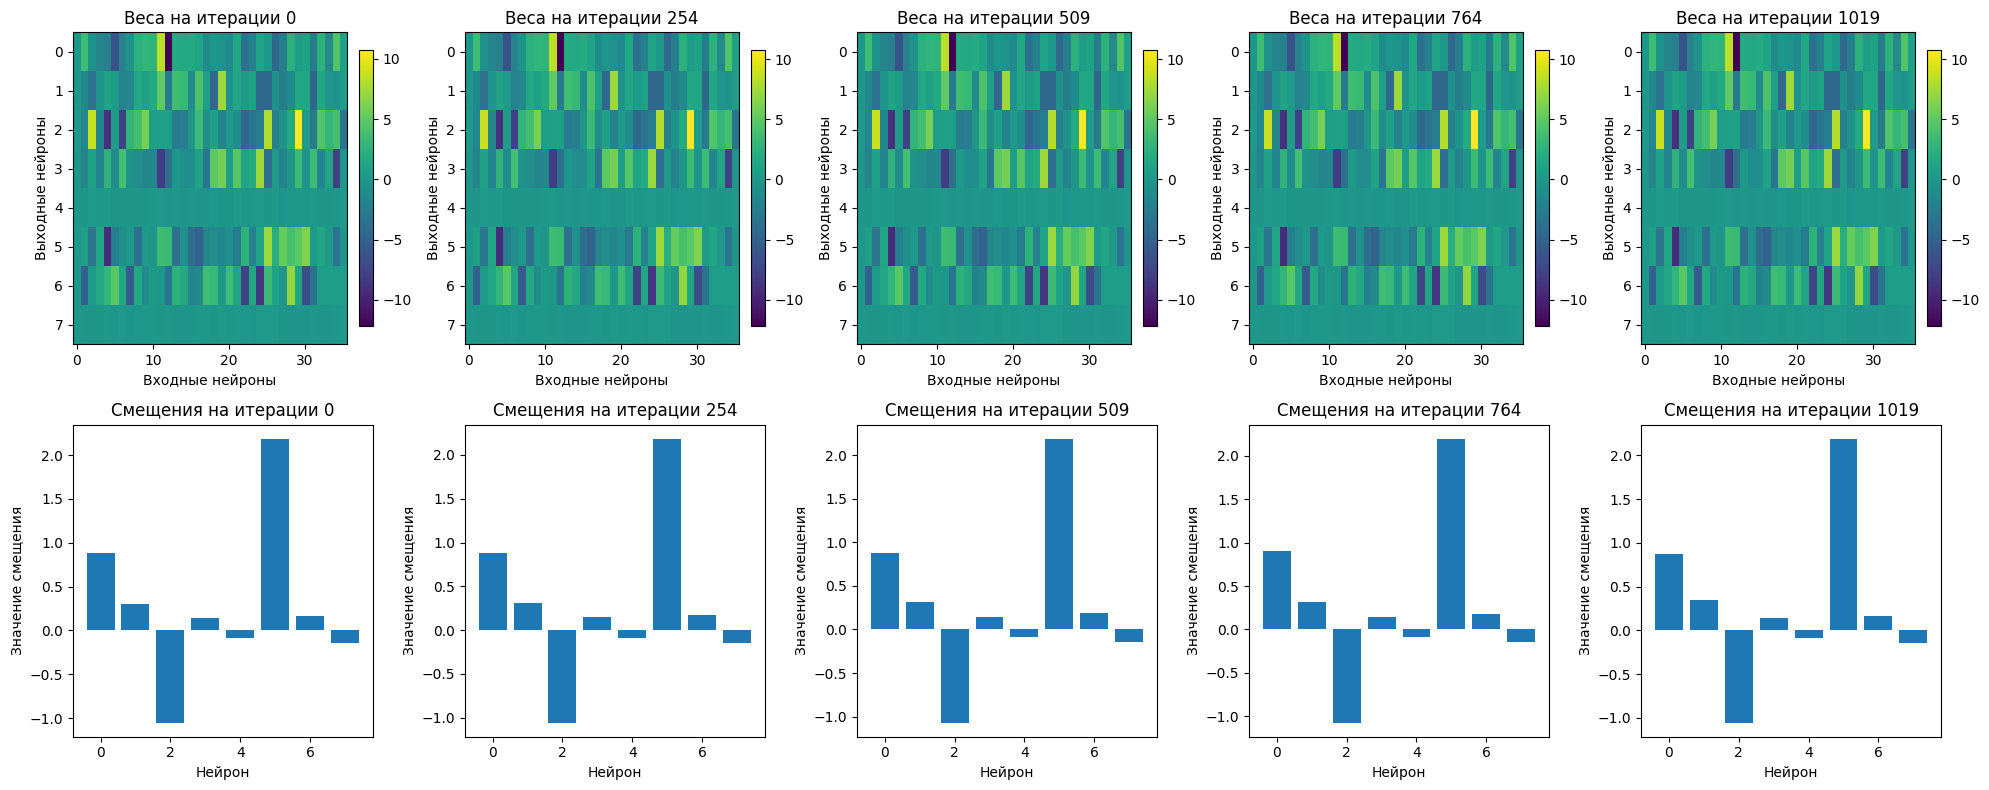

  ✅ Сохранена эволюция весов: weight_evolution_lr0.1.png


In [4]:
# Выбираем несколько ключевых итераций для анализа
def get_key_iterations(n_total, n_samples=5):
    """Возвращает индексы ключевых итераций"""
    if n_total <= n_samples:
        return list(range(n_total))
    indices = np.linspace(0, n_total-1, n_samples).astype(int)
    return indices

# Анализируем эволюцию весов для одного lr (например, 0.1)
target_lr = 0.1
if target_lr in all_params:
    params = all_params[target_lr]
    key_iterations = get_key_iterations(len(params), 5)
    
    print(f"\n🔄 Эволюция весов для lr={target_lr}:")
    print(f"Анализируем итерации: {key_iterations}")
    
    # Создаем сравнительную визуализацию
    fig, axes = plt.subplots(2, len(key_iterations), figsize=(4*len(key_iterations), 8))
    
    weight_evolution = []
    bias_evolution = []
    
    for i, iteration in enumerate(key_iterations):
        # Устанавливаем параметры модели
        set_model_params_from_vector(model, params[iteration])
        
        # Извлекаем веса первого слоя для визуализации
        first_layer = None
        for name, module in model.named_modules():
            if isinstance(module, nn.Linear):
                first_layer = module
                break
        
        if first_layer is not None:
            weights = first_layer.weight.detach().cpu().numpy()
            bias = first_layer.bias.detach().cpu().numpy() if first_layer.bias is not None else None
            
            weight_evolution.append(weights)
            if bias is not None:
                bias_evolution.append(bias)
            
            # Визуализация весов
            if len(key_iterations) == 1:
                ax_w = axes[0]
                ax_b = axes[1]
            else:
                ax_w = axes[0, i]
                ax_b = axes[1, i]
            
            # Тепловая карта весов
            im = ax_w.imshow(weights, aspect='auto', interpolation='nearest')
            ax_w.set_title(f'Веса на итерации {iteration}')
            ax_w.set_xlabel('Входные нейроны')
            ax_w.set_ylabel('Выходные нейроны')
            plt.colorbar(im, ax=ax_w, fraction=0.046, pad=0.04)
            
            # Гистограмма смещений
            if bias is not None:
                ax_b.bar(range(len(bias)), bias)
                ax_b.set_title(f'Смещения на итерации {iteration}')
                ax_b.set_xlabel('Нейрон')
                ax_b.set_ylabel('Значение смещения')
            else:
                ax_b.text(0.5, 0.5, 'Нет смещений', ha='center', va='center', transform=ax_b.transAxes)
                ax_b.set_title(f'Смещения на итерации {iteration}')
    
    plt.tight_layout()
    plt.savefig(f'weight_evolution_lr{target_lr}.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"  ✅ Сохранена эволюция весов: weight_evolution_lr{target_lr}.png")
else:
    print(f"❌ Данные для lr={target_lr} не найдены")

## 4. Статистика изменения весов

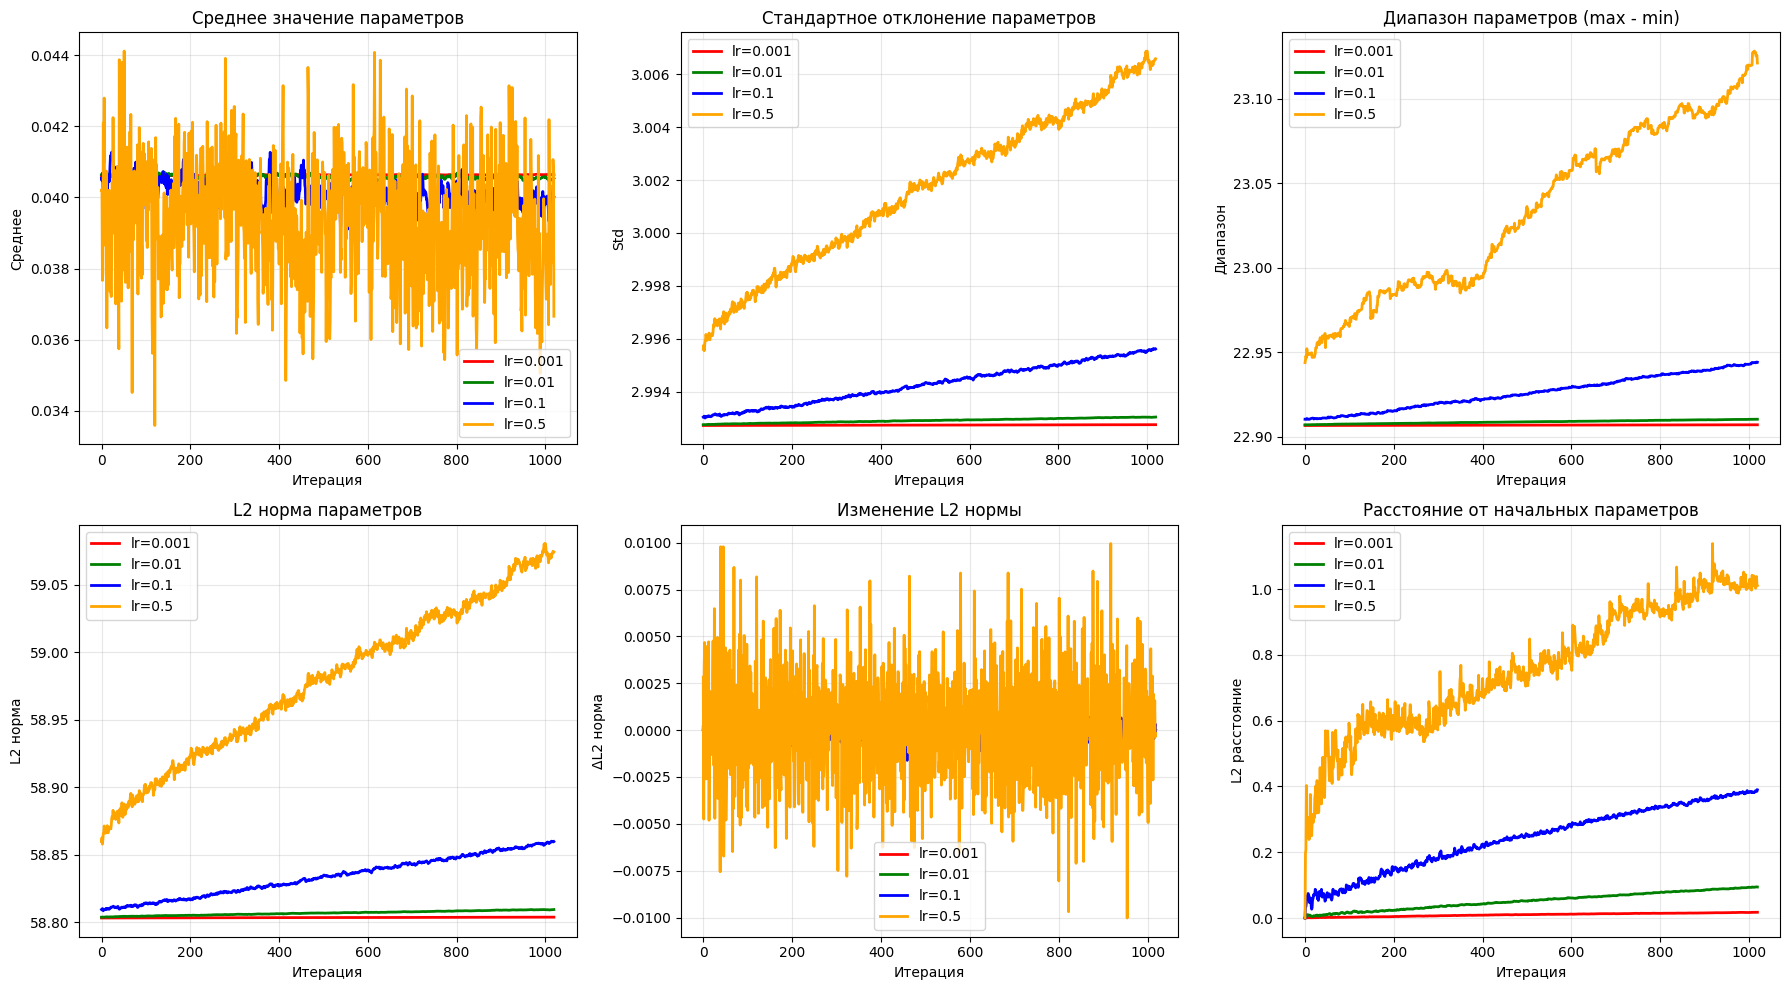

✅ Сохранена статистика эволюции параметров: parameter_statistics_evolution.png


In [5]:
# Анализируем как меняются статистики весов по траектории
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
colors = ['red', 'green', 'blue', 'orange']

for i, (lr, params) in enumerate(all_params.items()):
    color = colors[i % len(colors)]
    
    # Статистики по итерациям
    means = []
    stds = []
    mins = []
    maxs = []
    l2_norms = []
    
    for iteration in range(len(params)):
        param_vec = params[iteration]
        means.append(np.mean(param_vec))
        stds.append(np.std(param_vec))
        mins.append(np.min(param_vec))
        maxs.append(np.max(param_vec))
        l2_norms.append(np.linalg.norm(param_vec))
    
    # График 1: Среднее значение
    axes[0, 0].plot(means, color=color, linewidth=2, label=f'lr={lr}')
    axes[0, 0].set_title('Среднее значение параметров')
    axes[0, 0].set_xlabel('Итерация')
    axes[0, 0].set_ylabel('Среднее')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # График 2: Стандартное отклонение
    axes[0, 1].plot(stds, color=color, linewidth=2, label=f'lr={lr}')
    axes[0, 1].set_title('Стандартное отклонение параметров')
    axes[0, 1].set_xlabel('Итерация')
    axes[0, 1].set_ylabel('Std')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # График 3: Диапазон (max - min)
    ranges = np.array(maxs) - np.array(mins)
    axes[0, 2].plot(ranges, color=color, linewidth=2, label=f'lr={lr}')
    axes[0, 2].set_title('Диапазон параметров (max - min)')
    axes[0, 2].set_xlabel('Итерация')
    axes[0, 2].set_ylabel('Диапазон')
    axes[0, 2].legend()
    axes[0, 2].grid(True, alpha=0.3)
    
    # График 4: L2 норма
    axes[1, 0].plot(l2_norms, color=color, linewidth=2, label=f'lr={lr}')
    axes[1, 0].set_title('L2 норма параметров')
    axes[1, 0].set_xlabel('Итерация')
    axes[1, 0].set_ylabel('L2 норма')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # График 5: Изменение L2 нормы
    l2_changes = np.diff(l2_norms)
    axes[1, 1].plot(l2_changes, color=color, linewidth=2, label=f'lr={lr}')
    axes[1, 1].set_title('Изменение L2 нормы')
    axes[1, 1].set_xlabel('Итерация')
    axes[1, 1].set_ylabel('ΔL2 норма')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    # График 6: Расстояние от начальной точки
    initial_params = params[0]
    distances = [np.linalg.norm(params[j] - initial_params) for j in range(len(params))]
    axes[1, 2].plot(distances, color=color, linewidth=2, label=f'lr={lr}')
    axes[1, 2].set_title('Расстояние от начальных параметров')
    axes[1, 2].set_xlabel('Итерация')
    axes[1, 2].set_ylabel('L2 расстояние')
    axes[1, 2].legend()
    axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('parameter_statistics_evolution.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Сохранена статистика эволюции параметров: parameter_statistics_evolution.png")

## 5. Сравнение финальных моделей

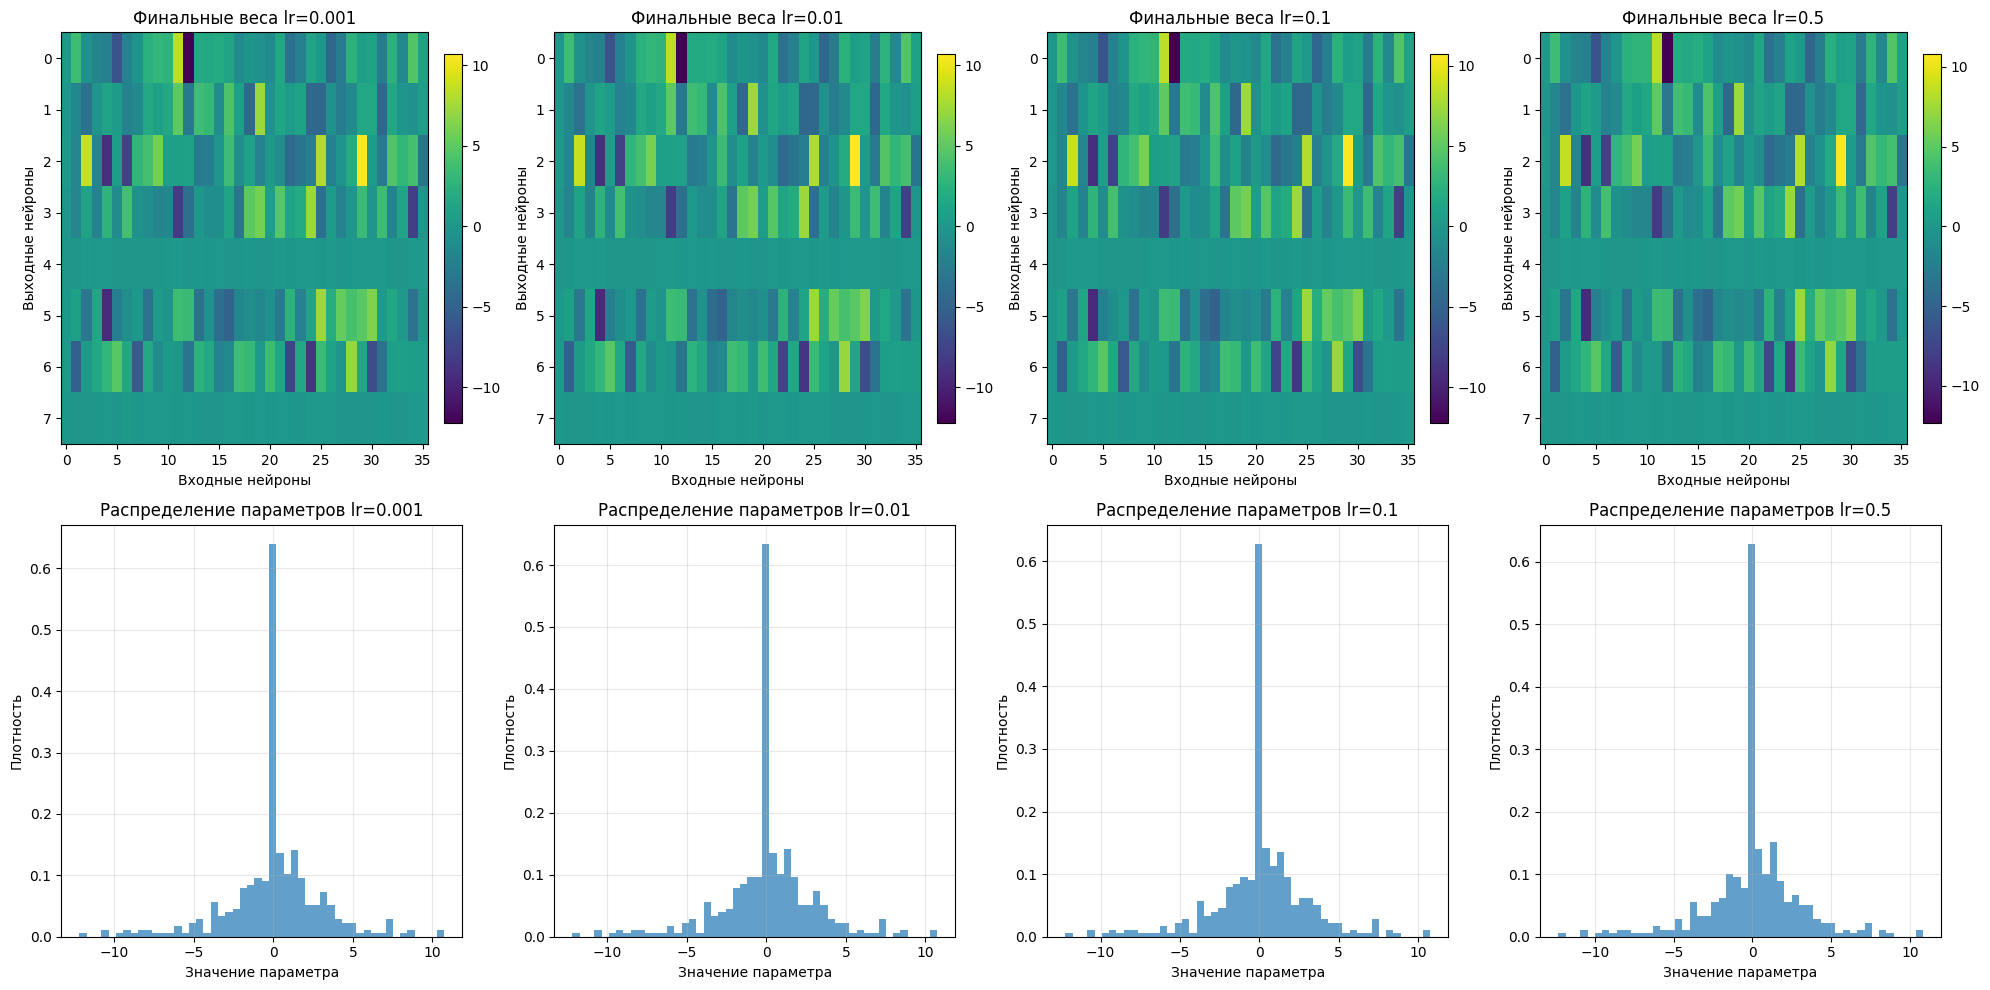

✅ Сохранено сравнение финальных моделей: final_models_comparison.png


In [6]:
# Создаем сравнительную визуализацию финальных весов
n_lrs = len(all_params)
fig, axes = plt.subplots(2, n_lrs, figsize=(5*n_lrs, 10))

for i, (lr, params) in enumerate(all_params.items()):
    # Устанавливаем финальные параметры
    set_model_params_from_vector(model, params[-1])
    
    # Извлекаем веса первого слоя
    first_layer = None
    for name, module in model.named_modules():
        if isinstance(module, nn.Linear):
            first_layer = module
            break
    
    if first_layer is not None:
        weights = first_layer.weight.detach().cpu().numpy()
        bias = first_layer.bias.detach().cpu().numpy() if first_layer.bias is not None else None
        
        # Тепловая карта весов
        if n_lrs == 1:
            ax_w = axes[0]
            ax_h = axes[1]
        else:
            ax_w = axes[0, i]
            ax_h = axes[1, i]
        
        im = ax_w.imshow(weights, aspect='auto', interpolation='nearest')
        ax_w.set_title(f'Финальные веса lr={lr}')
        ax_w.set_xlabel('Входные нейроны')
        ax_w.set_ylabel('Выходные нейроны')
        plt.colorbar(im, ax=ax_w, fraction=0.046, pad=0.04)
        
        # Гистограмма всех параметров
        all_params_flat = params[-1]
        ax_h.hist(all_params_flat, bins=50, alpha=0.7, density=True)
        ax_h.set_title(f'Распределение параметров lr={lr}')
        ax_h.set_xlabel('Значение параметра')
        ax_h.set_ylabel('Плотность')
        ax_h.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('final_models_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Сохранено сравнение финальных моделей: final_models_comparison.png")

## 6. Сводка результатов

In [7]:
# Создаем сводную таблицу характеристик финальных моделей
import pandas as pd

summary_data = []

for lr, params in all_params.items():
    initial_params = params[0]
    final_params = params[-1]
    
    # Статистики
    final_mean = np.mean(final_params)
    final_std = np.std(final_params)
    final_l2 = np.linalg.norm(final_params)
    distance_traveled = np.linalg.norm(final_params - initial_params)
    
    # Количество "мертвых" нейронов (с очень маленькими весами)
    threshold = 1e-6
    small_weights = np.sum(np.abs(final_params) < threshold)
    total_weights = len(final_params)
    
    summary_data.append({
        'lr': lr,
        'final_mean': final_mean,
        'final_std': final_std,
        'final_l2_norm': final_l2,
        'distance_traveled': distance_traveled,
        'small_weights': small_weights,
        'small_weights_ratio': small_weights / total_weights * 100,
        'total_iterations': len(params)
    })

df_summary = pd.DataFrame(summary_data)

print("📊 СВОДКА ХАРАКТЕРИСТИК ФИНАЛЬНЫХ МОДЕЛЕЙ")
print("=" * 80)
print(df_summary.round(6))

print("\n📝 Пояснения:")
print("  - final_mean: среднее значение финальных параметров")
print("  - final_std: стандартное отклонение финальных параметров")
print("  - final_l2_norm: L2 норма финальных параметров")
print("  - distance_traveled: расстояние от начальных до финальных параметров")
print("  - small_weights: количество параметров с |значение| < 1e-6")
print("  - small_weights_ratio: процент 'мертвых' параметров")
print("  - total_iterations: общее количество итераций в траектории")

# Сохраняем таблицу
df_summary.to_csv('model_summary.csv', index=False)
print("\n✅ Сводка сохранена в: model_summary.csv")

📊 СВОДКА ХАРАКТЕРИСТИК ФИНАЛЬНЫХ МОДЕЛЕЙ
      lr  final_mean  final_std  final_l2_norm  distance_traveled  \
0  0.001    0.040642   2.992749      58.803612           0.017399   
1  0.010    0.040538   2.993038      58.809250           0.094283   
2  0.100    0.040009   2.995610      58.859657           0.389713   
3  0.500    0.036659   3.006585      59.074417           1.010870   

   small_weights  small_weights_ratio  total_iterations  
0              0                  0.0              1020  
1              0                  0.0              1020  
2              0                  0.0              1020  
3              0                  0.0              1020  

📝 Пояснения:
  - final_mean: среднее значение финальных параметров
  - final_std: стандартное отклонение финальных параметров
  - final_l2_norm: L2 норма финальных параметров
  - distance_traveled: расстояние от начальных до финальных параметров
  - small_weights: количество параметров с |значение| < 1e-6
  - small_weigh

## 7. Выводы

На основе визуализации моделей из эксперимента 20:

1. **Эволюция весов**: Разные learning rates приводят к различным паттернам изменения весов
2. **Финальные распределения**: Можно наблюдать как lr влияет на итоговое распределение параметров
3. **Мертвые нейроны**: Анализ показывает количество параметров, которые стали практически нулевыми
4. **Расстояние в пространстве параметров**: Визуализация показывает насколько далеко ушли модели от начальной инициализации